# Renee Aid Preparation: Building a Contact Sheet

## Event: IBM Innovation Education Case Competition

### Author: Spriha Ghosh

Contact sheets are used for digital photographs, we can take one image and create nine different variants based on the brightness of that image. In this stage we are going to change the colors of the image, creating variations based on a single photo. 

>There are many complex ways to change a photograph using variations, such as changing a black and white image to either "cool" >variants, which have light purple and blues in them, or "warm" variants, which have touches of yellow and may look sepia >toned. In this assignment, you'll be just changing the image one color channel at a time.

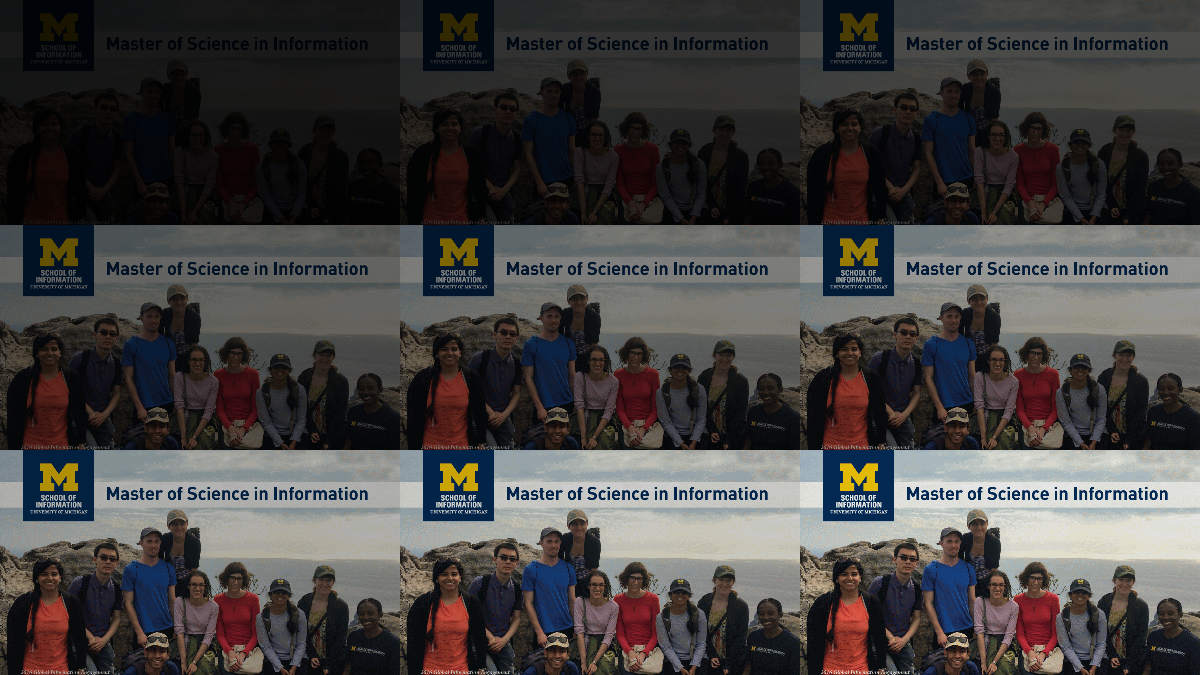

In [13]:
import PIL
from PIL import Image
from PIL import ImageEnhance

# read image and convert to RGB
image=Image.open("readonly/msi_recruitment.gif")
image=image.convert('RGB')

# build a list of 9 images which have different brightnesses
enhancer=ImageEnhance.Brightness(image)
images=[]
for i in range(1, 10):
    images.append(enhancer.enhance(i/10))

# create a contact sheet from different brightnesses
first_image=images[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
x=0
y=0

for img in images:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)

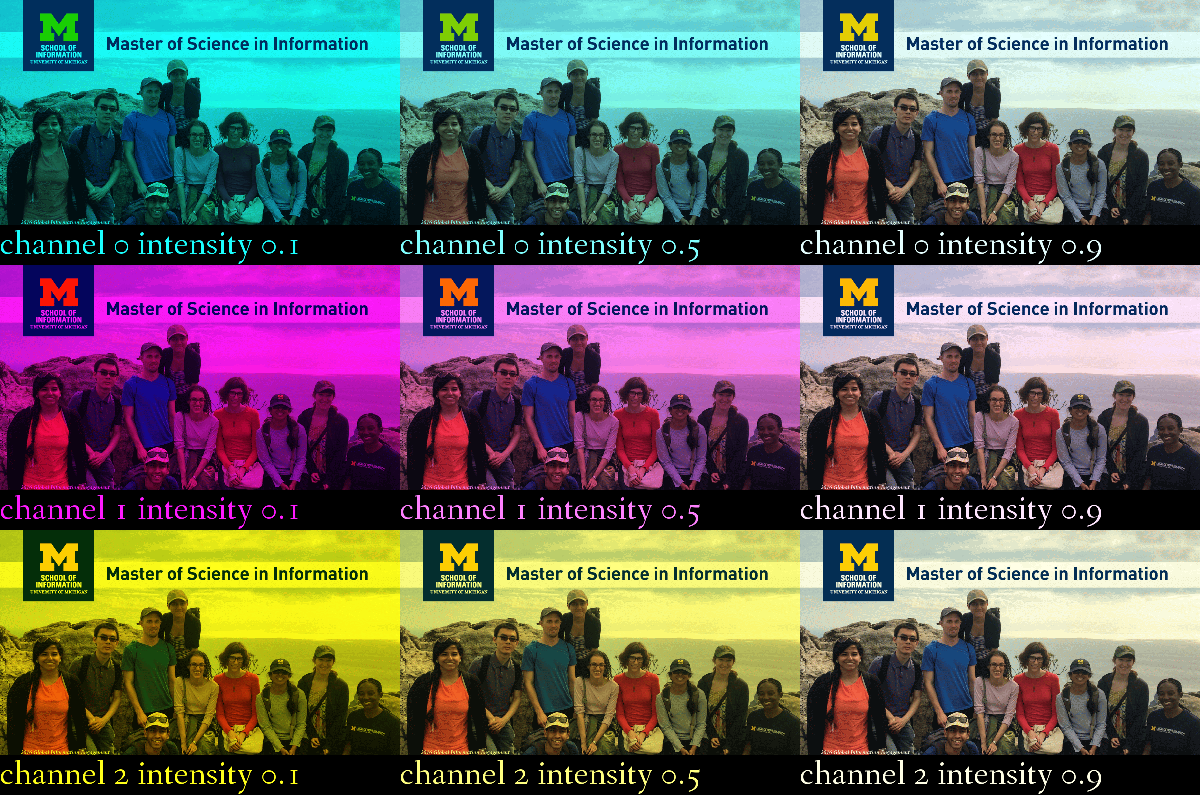

In [32]:
import PIL
from PIL import Image
from PIL import ImageEnhance
from PIL import ImageDraw
from PIL import ImageFont

def rgb_ch_intensity_slow(image, intensity, ch):
    """change the intensity of the channel passed on the image modifying
    pixel by pixel of the image"""
    # Create output image
    input_pixels = image.load()
    output_image = Image.new("RGB", image.size)
    draw = ImageDraw.Draw(output_image)

    # Generate image
    for x in range(output_image.width):
        for y in range(output_image.height):
            r, g, b = input_pixels[x, y]
            if ch == 0:
                r = int(r * intensity)
                g = g
                b = b
            elif ch == 1:
                r = r
                g = int(g * intensity)
                b = b
            elif ch == 2:
                r = r
                g = g
                b = int(b * intensity)
            draw.point((x, y), (r, g, b))
    return output_image

def rgb_ch_intensity_fast(image, intensity, ch):
    """change the intensity of the channel passed on the image using 
    the matrix argument in the convert method of Pillow Image object"""
    rgb_matrix = [ 1, 0, 0, 0,
                   0, 1, 0, 0,
                   0, 0, 1, 0 ]
    index = ch * 5
    rgb_matrix[index] = intensity
    return image.convert("RGB", rgb_matrix)



txt_band_height = 80
txt_size = 70

intensities = [0.1,0.5,0.9]

# read image and convert to RGB
image=Image.open("readonly/msi_recruitment.gif")

# create the text band
image_rgb = image.convert('RGB')
first_image = PIL.Image.new(image_rgb.mode, (image_rgb.width,image_rgb.height+txt_band_height) )
first_image.paste(image_rgb, (0,0))

contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))

# starting co-ordinates placement of the image
x=0
y=0

# index of the intensities
index = 0

# index of the channel
channel = 0

# get the font
fnt = ImageFont.truetype("readonly/fanwood-webfont.ttf", size=txt_size)
    
#for img in images:
for _ in range(1, 10):
    # Lets paste the current image into the contact sheet
    
    # create text
    txt_string = "channel {} intensity {}".format(channel, intensities[index])
    
    # make a copy of the image where to modify the text
    cp_image = first_image.copy()
    # attach the text
    edit_image = ImageDraw.Draw(cp_image)
    edit_image.text((0,first_image.height-txt_size), txt_string, font = fnt)
    
    # modify the color channel
    new_img = rgb_ch_intensity_fast(cp_image,intensities[index],channel)
    #new_img = rgb_ch_intensity_slow(cp_image,intensities[index],channel)
    
    contact_sheet.paste(new_img, (x, y) )

    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        # reset the index of the intensities array
        index = 0
        # update the channel
        channel += 1
        x=0
        y=y+first_image.height
    else:
        # update the index of the intensities array
        index += 1
        x=x+first_image.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)

## Observation

From the image you can see there are two parameters which are being varied for each sub-image. 

First, the rows are changed by color channel, where the top is the red channel, the middle is the green channel, and the bottom is the blue channel. The colors don't look more red, green, and blue, in that order because the change to be made is the ratio, or intensity, or that channel, in relationship to the other channels. 

We have used three different intensities- 

- 0.1 (reduce the channel a lot)
- 0.5 (reduce the channel in half)
- 0.9 (reduce the channel only a little bit).

>For instance, a pixel represented as (200, 100, 50) is a sort of burnt orange color. So the top row of changes would create >three alternative pixels, varying the first channel (red). one at (20, 100, 50), one at (100, 100, 50), and one at (180, 100, >50). The next row would vary the second channel (blue), and would create pixels of color values (200, 10, 50), (200, 50, 50) >and (200, 90, 50).

The font used is located in the file `readonly/fanwood-webfont.ttf`